In [54]:
import matplotlib.pyplot as plt
import numpy as np


['/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0170.jpg', '/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0175.jpg', '/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0176.jpg', '/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0376.jpg']


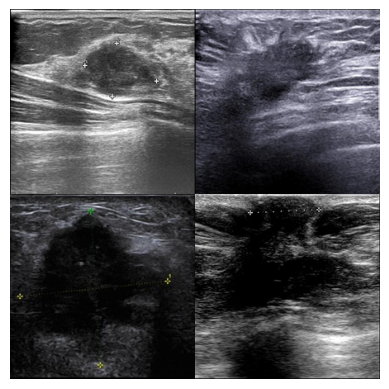

In [55]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
random.seed(44)

def data_show(label):
    # 设置图片文件夹路径
    image_folder = f'/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/{label}/'

    if label == '0':
        selected_images = [
            "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/0/FB_12.jpg",
            "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/0/FB_14.jpg",
            "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/0/FB_44.jpg",
            "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/0/FB_158.jpg"
            ]
    elif label == "1":
        selected_images=[
           "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0170.jpg",
           "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0175.jpg",
           "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0176.jpg",
           "/export/home/wuyueting/breast_data/BM/3_labelcroped/test/1/BIC_0376.jpg"
        ]
            
    print(selected_images)
    images = [Image.open(os.path.join(image_folder, img)) for img in selected_images]

    size = 224
    # 设定固定尺寸，每张图片 112x112
    target_size = (size, size)

    # 缩放图片到目标尺寸
    resized_images = [img.resize((target_size),Image.ANTIALIAS) for img in images]

    # 创建固定尺寸的拼接画布 224x224
    canvas_size = (size*2, size*2)
    new_image = Image.new('RGB', canvas_size)

    # 逐一粘贴缩放后的图片到 2x2 网格
    new_image.paste(resized_images[0], (0, 0))  # 左上角
    new_image.paste(resized_images[1], (size, 0))  # 右上角
    new_image.paste(resized_images[2], (0, size))  # 左下角
    new_image.paste(resized_images[3], (size, size))  # 右下角

    # 使用 matplotlib 显示拼接好的图片
    plt.imshow(new_image)
    plt.axis('off')  # 不显示坐标轴
    

    plt.savefig(f'breast_{label}.png', dpi=330,transparent=True,bbox_inches='tight')
    plt.show()

data_show('1')

## pruning(The number of neurons pruned vs Accuracy plot)

In [56]:
categories_bak = {
'composition': [
    "mixed cystic-solid nodule",
    "mixed cystic/solid nodule",
    "spongiform nodule",
    "circular cyst",
    "solid nodule",
],
'echo': [
    "anechoic echo nodule",
    "isoechoic echo nodule",
    "hypoechoic echo nodule",
    "hyperechoic echo nodule"
],
'shape': [
    "oval shape nodule",
    "round shape nodule",
    "irregular shape nodule",
    "Regular shape nodule",
    "regular shape nodule",
    
],
'margin': [
    "marginal irregular nodule",
    "marginal smooth nodule",
    "marginal ill-defined nodule",
    "marginal lobulated nodule"
],
'echogenic foci': [
    "punctate calcified nodule",
    "peripheral calcified nodule",
    "massive area calcified nodule"
],
'ratio': [
    "wider-than-tall nodule",
    "taller-than-wide nodule",
    "vertically elongated nodule",  # 新增
    "horizontally elongated nodule",  # 新增
    "transverse nodule",
    "longitudinal nodule"
],
'density': [
    "low-density nodule",
    "equal-density nodule",
    "high-density nodule"
]
}
color_map = {
    
    # 'Echo': '#96B6D8',
    # 'Shape': '#97C8AF',
    # 'Ratio':'#ADD8E6',
    # 'Margin':'#BEB8DC',
    # 'Calcification': '#F09148',
    # 'Composition': '#FFA07A',
    # 'Density':  '#FFBE72' ,
    
    'echo': '#F8AC8C',
    'shape': '#F1D77E',
    'ratio':'#B1CE46',
    'margin':'#63E398',
    'echogenic foci': '#9DC3E7',
    'composition': '#9394E7',
    'density':  '#5F97D2' ,
}

In [57]:
categories_birads = {
"Shape" : [
    "rounded lesion",
    "oval lesion",
    "irregular lesion"
],

# Margin-related lesions
"Margin" : [
    "lesion with circumscribed margin",
    "lesion showing angular margins",
    "lesion with microlobulated margins",
    "lesion with spiculated margins",
    "lesion with indistinct margins"
],

# Halo-related lesion
"Halo" : [
    "lesion with surrounding echogenic halo"
],

# Orientation-related lesions
"Orientation" : [
    "wider than tall lesion",
    "taller than wide lesion",
    "horizontal oriented lesion",
    "vertical oriented lesion"
],

# Echo-related lesions
"Echo" : [
    "wider than tall hypoechoic lesion",
    "taller than wide hypoechoic lesion",
    "hypoechoic nonparallel lesion",
    "hypoechoic parallel lesion",
    "hyperechoic lesion",
    "isoechoic lesion",
    "hypoechoic lesion"
],

# Calcification-related lesions
"Calcification" : [
    "punctate calcified lesion",
    "peripheral calcified lesion",
    "massive area calcified lesion",
    "homogeneously non-calcified lesion",
],

# Homogeneity-related lesions
"Homogeneous" : [
    "homogeneous lesion",
    "heterogeneous lesion"
],

# Posterior feature-related lesions
"Posterior" : [
    "lesion with posterior shadowing",
    "lesion with posterior enhancement",
    "lesion with no posterior change"
],

# Size-related lesions
"Size" : [
    "small lesion",
    "medium lesion",
    "large lesion"
],
}
color_map = {
    
    # 'Echo': '#96B6D8',
    # 'Shape': '#97C8AF',
    # 'Ratio':'#ADD8E6',
    # 'Margin':'#BEB8DC',
    # 'Calcification': '#F09148',
    # 'Composition': '#FFA07A',
    # 'Density':  '#FFBE72' ,
    
    'echo': '#F8AC8C',
    'shape': '#F1D77E',
    'ratio':'#B1CE46',
    'margin':'#63E398',
    'echogenic foci': '#9DC3E7',
    'composition': '#9394E7',
    'density':  '#5F97D2' ,
}

In [58]:
def get_categories_and_colormap():
    categories = {
    # Tissue Composition
    "Tissue composition": [
        "homogeneously non-calcified lesion",
        "homogeneous lesion",
        "heterogeneous lesion"
    ],
    
    # Masses
    "Masses": [
        "rounded lesion",
        "oval lesion",
        "irregular lesion",
        "lesion with circumscribed margin",
        "lesion showing angular margins",
        "lesion with microlobulated margins",
        "lesion with spiculated margins",
        "lesion with indistinct margins",
        "lesion with distinct margins",
        "lesion with surrounding echogenic halo",
        "wider than tall lesion",
        "taller than wide lesion",
        "horizontal oriented lesion",
        "vertical oriented lesion",
        "hyperechoic lesion",
        "isoechoic lesion",
        "hypoechoic lesion",
        "wider than tall hypoechoic lesion",
        "taller than wide hypoechoic lesion",
        "hypoechoic nonparallel lesion",
        "hypoechoic parallel lesion",
        "lesion with posterior shadowing",
        "lesion with posterior enhancement",
        "lesion with no posterior change",
        "small lesion",
        "medium lesion",
        "large lesion"
    ],
    
    # Calcifications
    "Calcifications": [
        "punctate calcified lesion",
        "peripheral calcified lesion",
        "massive area calcified lesion"
    ]
    }
    #'#FFA07A', '#97C8AF', '#ADD8E6'
    color_map = {
        'Tissue composition': '#9392BE',
        'Masses': '#D0E7ED',
        'Calcifications':'#D5E4A8',
    }
    return categories, color_map


['Tissue composition', 'Masses', 'Calcifications']


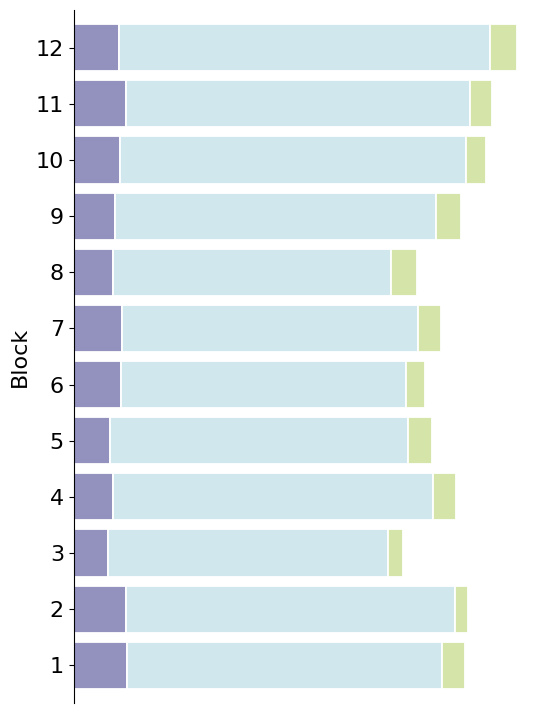

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
def barchat(clipmodel_name):
    if clipmodel_name == "biomedclip":
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/breast_vit_base_3_24_09_25_17_02/descriptions.csv" ## 
    elif clipmodel_name == "vit":
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_07_12_17_24/descriptions.csv" ##Vit-L/14
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_08_02_11_17/descriptions.csv" ##vit-L/14
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_08_02_14_43/descriptions.csv" ##resnet50

    df = pd.read_csv(filename)
    df.loc[df['similarity'] > 1, 'description'] = None
    categories,color_map = get_categories_and_colormap()
    description_to_category = {}
    for category, items in categories.items():
        for item in items:
            description_to_category[item] = category
    df['category'] = df['description'].map(description_to_category)
    # Count the number of units per layer per category
    category_counts = df.groupby(['layer', 'category']).size().unstack(fill_value=0)
    
    # 按数字排序索引，假设格式为 'blocks[n]'，其中 n 是数字
    category_counts.index = category_counts.index.astype(str)
    
    category_counts.sort_index(key=lambda x: x.str.extract('(\d+)', expand=False).astype(int), inplace=True)
    # category_counts = category_counts.iloc[::-1]
    # category_counts = category_counts.iloc[::]
    category_counts.index = (category_counts.index.str.extract('(\d+)', expand=False).astype(int) + 1).astype(str)
    
    sorted_columns = [key for key in color_map.keys() if key in category_counts.columns]
    print(sorted_columns)
    category_counts = category_counts[sorted_columns]
    # 绘制累积柱状图
    # colors = ['#F09148','#FFA07A','#FFBE72', '#96B6D8', '#BEB8DC' , '#ADD8E6' ,'#97C8AF']
    ax = category_counts.plot(kind='barh', stacked=True, figsize=(6, 9), color=color_map, width=0.84, edgecolor='white', linewidth=1.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # 添加标题和标签

    # 显示图形
    ax.xaxis.set_visible(False)
    ax.legend().set_visible(False)
    # plt.xticks(rotation=45)
    # ax.set_title('Trend Analysis', fontsize=18)  # 调整标题字体大小
    # ax.set_xlabel('X-axis Label', fontsize=16)  # 调整X轴标签字体大小
    ax.set_ylabel('Block', fontsize=16)  # 调整Y轴标签字体大小
    ax.tick_params(axis='y', labelsize=16)  # 将Y轴刻度标签的字体大小设置为16
    plt.savefig("trend.png", bbox_inches='tight',dpi=330, transparent=True)
    plt.show()
    
barchat('biomedclip')

In [60]:
abbreviation_dict = {
    "rounded lesion": "RL",
    "oval lesion": "OL",
    "irregular lesion": "IRL",
    "lesion with circumscribed margin": "LCM",
    "lesion showing angular margins": "LAM",
    "lesion with microlobulated margins": "LMM",
    "lesion with spiculated margins": "LSM",
    "lesion with indistinct margins": "LIM",
    "lesion with distinct margins":"LDM",
    "lesion with surrounding echogenic halo": "LEH",
    "wider than tall lesion": "WTL",
    "taller than wide lesion": "TWL",
    "horizontal oriented lesion": "HOL",
    "vertical oriented lesion": "VOL",
    "wider than tall hypoechoic lesion": "WTHEL",
    "taller than wide hypoechoic lesion": "TWHL",
    "hypoechoic nonparallel lesion": "HNPL",
    "hypoechoic parallel lesion": "HPL",
    "hyperechoic lesion": "HEL",
    "isoechoic lesion": "ISEL",
    "hypoechoic lesion": "HYPL",
    "punctate calcified lesion": "PCL",
    "peripheral calcified lesion": "PeCL",
    "massive area calcified lesion": "MACL",
    "homogeneously non-calcified lesion": "HNCL",
    "homogeneous lesion": "HOML",
    "heterogeneous lesion": "HETL",
    "lesion with posterior shadowing": "LPS",
    "lesion with posterior enhancement": "LPE",
    "lesion with no posterior change": "LNPC",
    "small lesion": "SL",
    "medium lesion": "ML",
    "large lesion": "LL"
}

/tmp/ipykernel_114579/1963811048.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_sorted.loc[:, 'abbr'] = grouped_sorted['description'].apply(lambda x: abbreviation_dict.get(x, None))


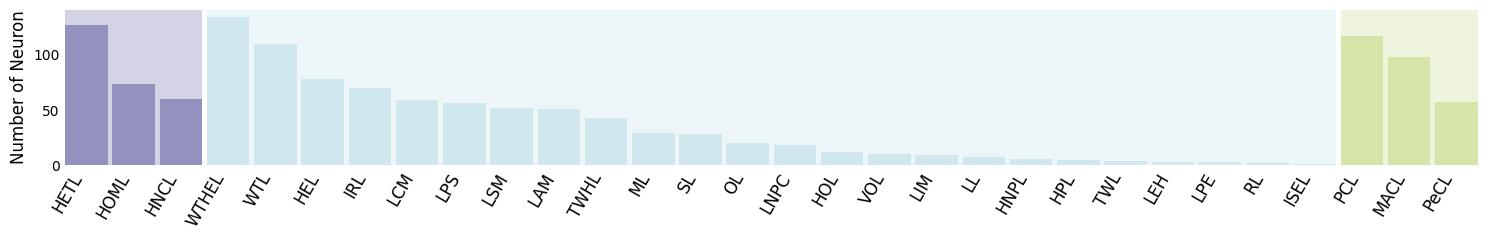

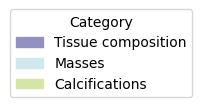

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def draw_THYROID(number=1):
    df = pd.read_csv('/export/home/wuyueting/Interpretability/CLIP-dissect/results/breast_vit_base_3_24_09_25_17_02/descriptions.csv')
    # df = pd.read_csv("/export/home/wuyueting/Interpretability/CLIP-dissect/results/breast_vit_base_3_24_11_01_16_38/descriptions.csv")
    categories,color_map = get_categories_and_colormap()
# Create a vertical bar plot with the x-axis being the description and the y-axis being the number of neurons
    df_filtered = df[(df['similarity'] > 1)& (df['layer'] == 'blocks['+str(number)+'].mlp.act')].copy()
    # df_filtered = df[(df['similarity'] > 1)].copy()
    df_filtered['category_color'] = 'grey'
    # print(df_filtered)
    # Assign colors to each row based on its category
    description_to_color = {}  # 描述到颜色的映射
    for category, items in categories.items():
        for item in items:
            description_to_color[item] = color_map[category]
    # 将颜色应用到过滤后的DataFrame
    df_filtered['category_color'] = df_filtered['description'].apply(lambda x: description_to_color.get(x, 'grey'))
    
    # print(df_filtered)
    # 确保所有描述都有有效的颜色
    assert not df_filtered['category_color'].isna().any(), "在'category_color'列中存在NaN值"

    # 统计每个描述的频率
    description_counts = df_filtered['description'].value_counts()
    description_counts = description_counts[description_counts > 0]
    
    # 更新 description_to_color 字典以包含计数信息
    for description in description_to_color.keys():
        # 获取描述的计数值，如果描述不存在于 description_counts 中，则返回0
        count = description_counts.get(description, 0)
        # 将颜色和计数作为元组存储
        description_to_color[description] = (description_to_color[description], count)

    # 打印更新后的字典
    data = {
    'description': [],
    'category_color': [],
    'counts': []
    }

    # 填充数据
    for description, (color, count) in description_to_color.items():
        data['description'].append(description)
        data['category_color'].append(color)
        data['counts'].append(count)

    color_order = {color: index for index, color in enumerate(color_map.values())}
    # 创建 DataFrame
    description_df = pd.DataFrame(data)
    color_order = {color: i for i, color in enumerate(color_map.values())}

    # 根据颜色顺序进行初步排序
#     description_df['color_order'] = description_df['category_color'].map(color_order)

# # # 对每个颜色组进行 counts 的降序排序
#     grouped_sorted = description_df.sort_values(by='category_color', key=lambda x: x.map(color_order))
#     grouped_sorted = grouped_sorted[grouped_sorted['counts']>0]
    
        # 将颜色顺序映射到数据框中
    description_df['color_order'] = description_df['category_color'].map(color_order)

    # 首先按照颜色顺序进行排序
    description_df = description_df.sort_values(by='color_order')

    # 然后对相同颜色内的数据按照 counts 进行降序排序
    description_df = description_df.sort_values(by=['color_order', 'counts'], ascending=[True, False])

    # 移除临时的 color_order 列
    description_df = description_df.drop(columns=['color_order'])
    grouped_sorted = description_df
    grouped_sorted = grouped_sorted[grouped_sorted['counts']>0]
    # grouped_sorted = grouped_sorted.sort_values(by=['counts','category_color'], ascending=[False, False])
    bar_width=1
    positions = range(len(grouped_sorted['counts']))
    
    unique_colors = grouped_sorted['category_color'].unique()
    color_blocks = {color: [] for color in unique_colors}
    
    # Determine the start and end positions for each color block
    last_color = None
    for i, (color, count) in enumerate(zip(grouped_sorted['category_color'], grouped_sorted['counts'])):
        if color != last_color:
            if last_color is not None:
                color_blocks[last_color][-1].append(i)  # End position of the last block
            color_blocks[color].append([i])  # Start position of the new block
            last_color = color
    # print(last_color)
    color_blocks[last_color][-1].append(i + 1)  # End position of the last block
    grouped_sorted.loc[:, 'abbr'] = grouped_sorted['description'].apply(lambda x: abbreviation_dict.get(x, None))
    # print( grouped_sorted)
    # Adjusting the figure size dynamically based on the number of bars
    # plt.figure(figsize=(len(grouped_sorted['counts']), 2))

    # # Plotting the bars with fixed width and positions aligned to the left
    # plt.bar(positions, grouped_sorted['counts'], width=bar_width, color=grouped_sorted['category_color'], align='edge')

    # # Add shaded regions for each color block
    # for color, blocks in color_blocks.items():
    #     for start, end in blocks:
    #         plt.axvspan(start, end , color=color, alpha=0.4)  # Using a lighter shade with alpha

    # # Hide the frame of the plot and remove all text
    # for spine in plt.gca().spines.values():
    #     spine.set_visible(False)
    # plt.tick_params(labelbottom=False, bottom=False)
    # plt.tick_params(labelleft=False, left=False)
    # plt.xlim(0, len(grouped_sorted['counts']))
    # plt.ylim(0, 30)
    # plt.xlabel('')
    # plt.ylabel('')
    # plt.title('')

    # plt.tight_layout()  # Adjust layout
    # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    # # Show the plot
    # plt.show()
    
    plt.figure(figsize=(len(grouped_sorted['counts'])//2, 2.5))
    plt.bar(grouped_sorted['abbr'], grouped_sorted['counts'], color=grouped_sorted['category_color'],width=0.9, align='center')

    # plt.bar(grouped_sorted['description'], grouped_sorted['counts'], color=grouped_sorted['category_color'],align='edge')

    # Add shaded regions for each color block
    for color, blocks in color_blocks.items():
        for start, end in blocks:
            plt.axvspan(start-0.45, end-0.55 , color=color, alpha=0.4,linewidth=0)
            
    # # 添加图例到图表
    # plt.legend(handles=legend_handles, title="Categories",framealpha=1.0, facecolor='white', loc='right')

    # plt.title('Number of Neuron per Description')
    # plt.xticks(rotation=60, ha='right')
    
    # 设置X轴标签字体大小和旋转角度
    plt.xticks(rotation=60, ha='right', fontsize=12)
    plt.ylabel('Number of Neuron', fontsize=12)  # 设置标题字体大小
    # plt.title('Block 12 summary( block closest to the output)',fontsize=12)
    # plt.subplots_adjust(left=-0.05)
    plt.tick_params(axis='y', which='both', pad=2)
    plt.tick_params(axis='x', which='both', length=0)  # 隐藏x轴的刻度线但保留标签
    plt.tick_params(axis='y', which='both', length=0)  # 隐藏y轴的刻度线    
    plt.xlim(-0.5, len(grouped_sorted['description']) - 0.5)
    # 去掉边框
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    # 显示图表
    plt.savefig(f'layer{number}.png', dpi=330, transparent=True, bbox_inches='tight')
    plt.show()
    
    
    
    legend_handles = []

    # 对于我们的颜色映射字典，为每个颜色创建一个图例项
    # 假设我们已经有了color_map变量
    for category, color in color_map.items():
        # 使用matplotlib.patches中的Patch对象创建图例项
        handle = mpatches.Patch(color=color, label=category)
        legend_handles.append(handle)

    # 创建一个空的图形
    fig, ax = plt.subplots()

    # 添加图例
    legend = ax.legend(handles=legend_handles, title="Category", loc='center')

    # 删除所有轴，但保留图例
    ax.axis('off')

    # 设置图形大小适合图例
    fig.canvas.draw()
    bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.set_size_inches(bbox.width, bbox.height)

    # 保存图例为图片
    plt.savefig('legend.png', dpi=330,transparent=True,bbox_inches='tight')
    # 显示图例
    plt.show()
    

draw_THYROID(11)

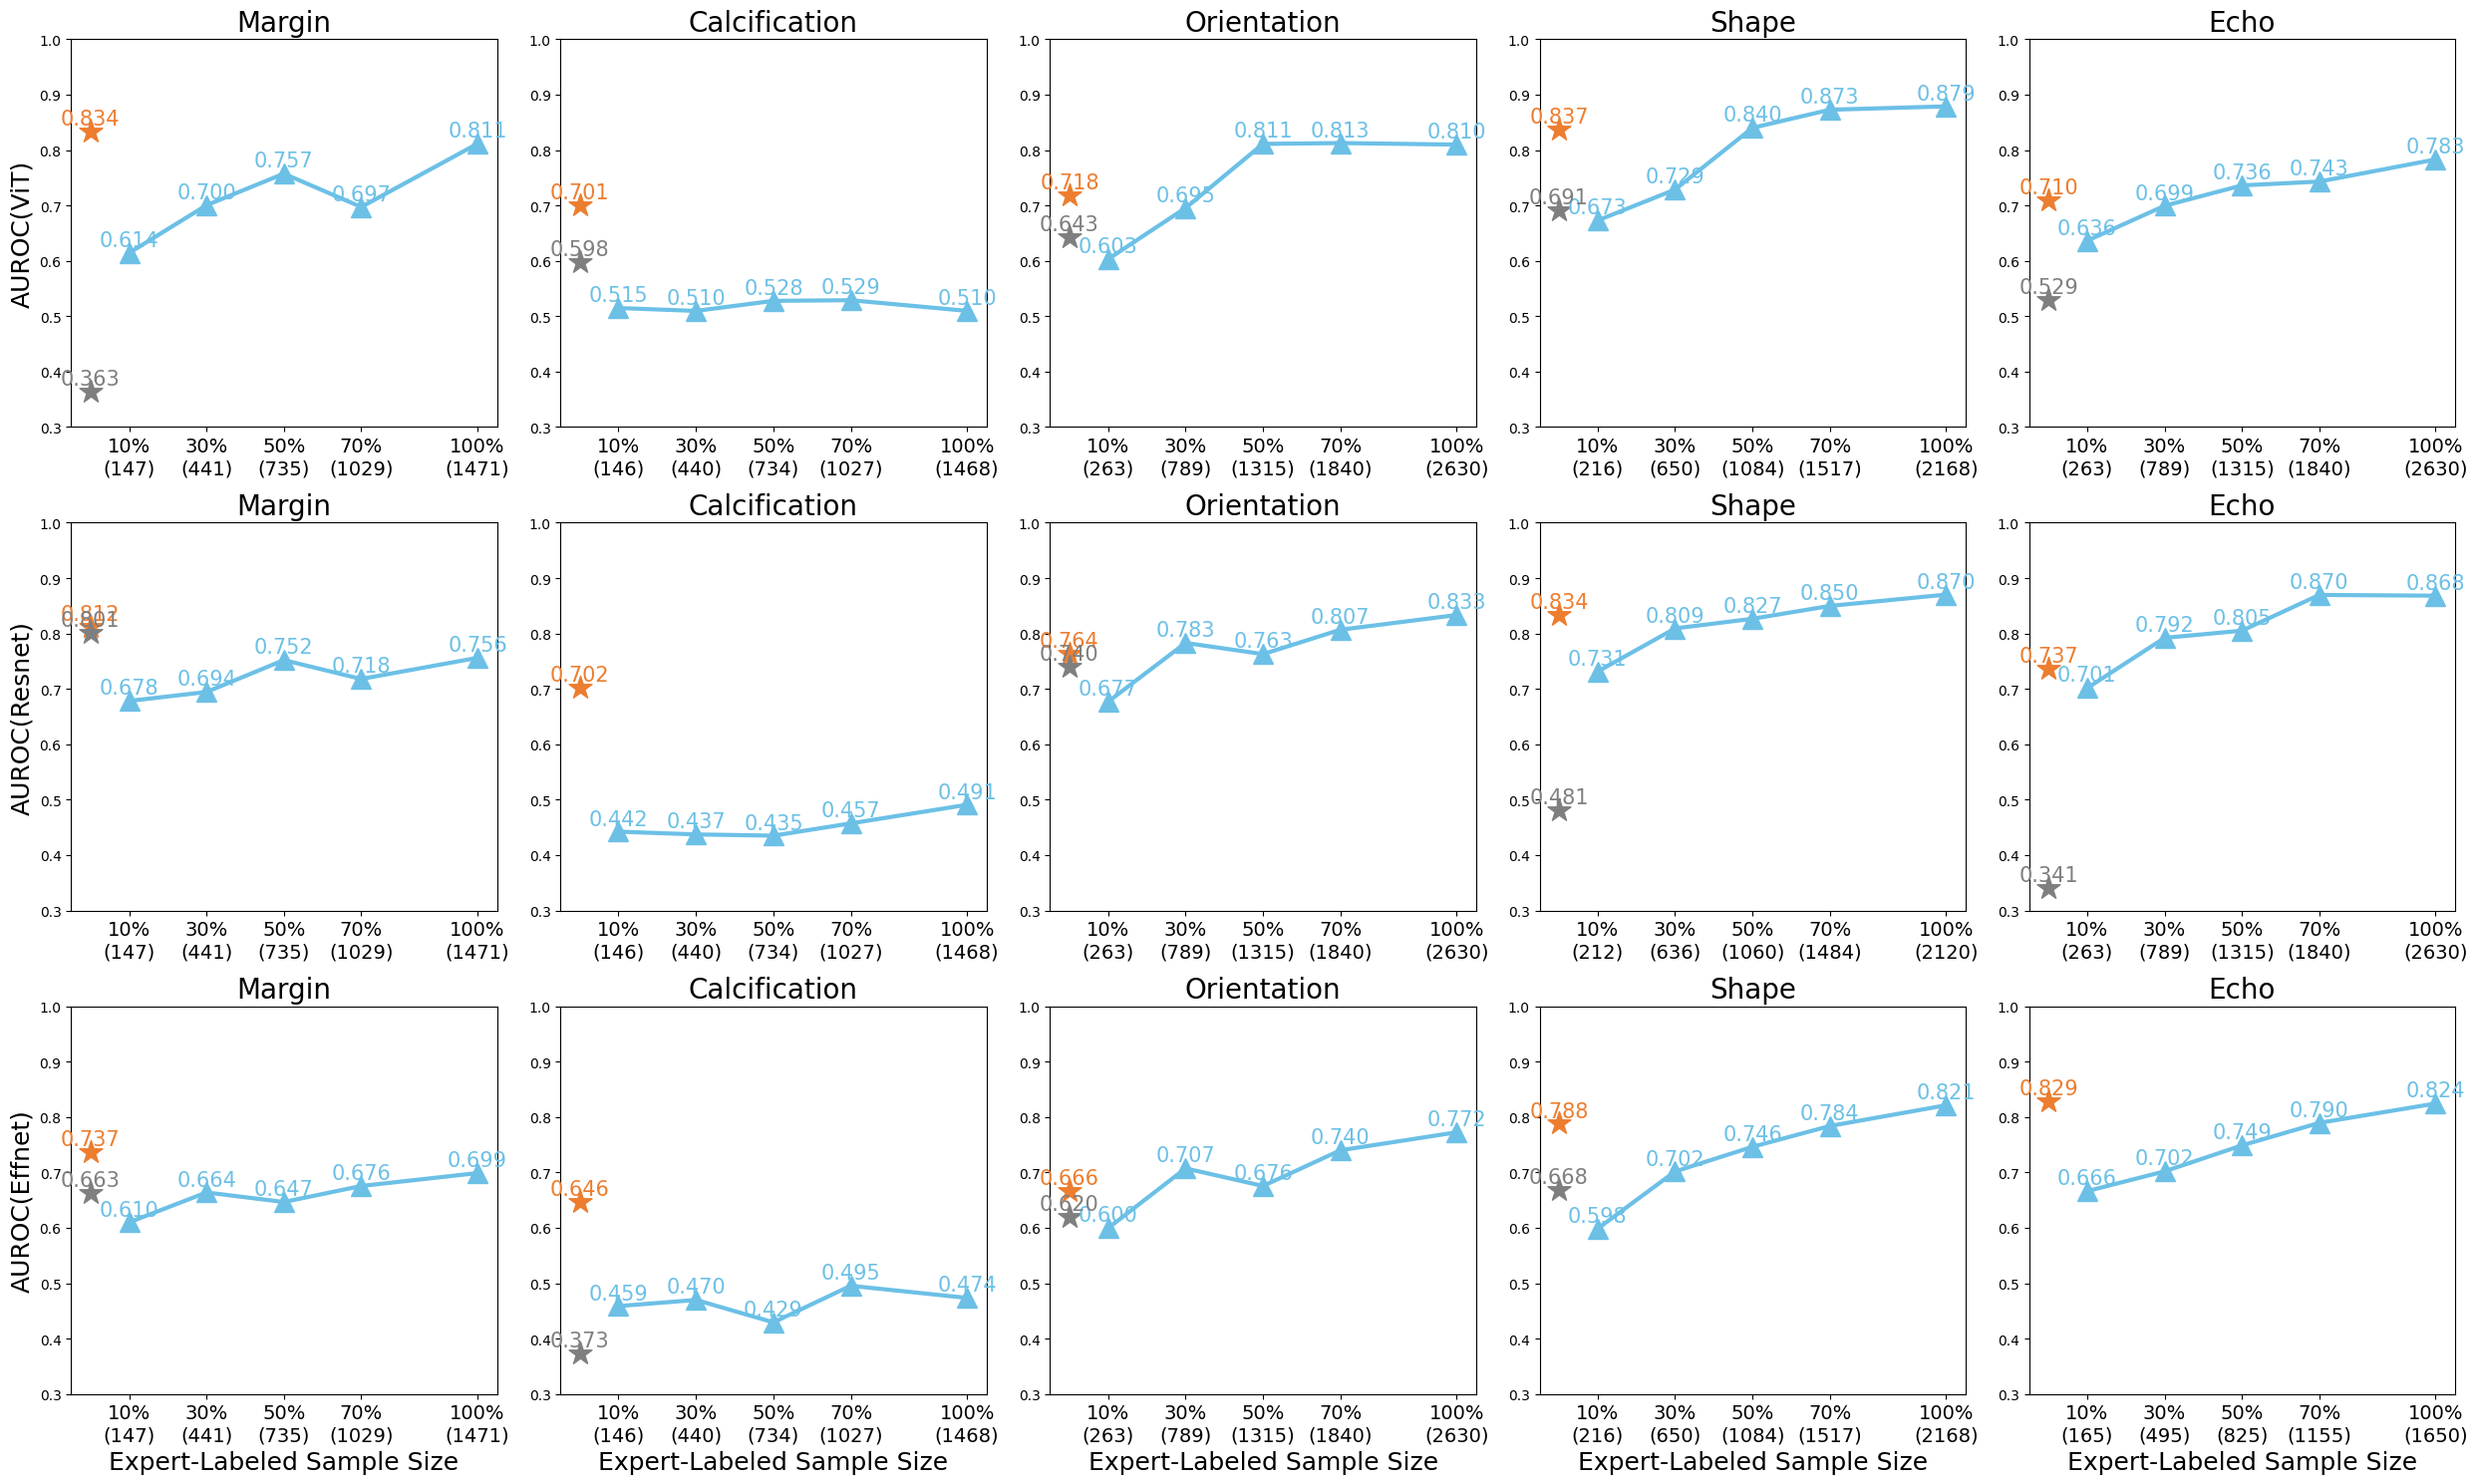

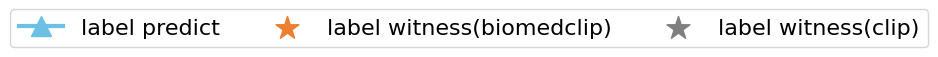

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from matplotlib import gridspec

#Resnet
paths2 = {
    "Margin":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Margin_2024-09-27_20-25-32/result.csv",
    "Calcification":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Calcification_2024-09-27_20-25-32/result.csv",
    "Orientation":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Orientation_2024-09-27_20-25-32/result.csv",
    "Shape":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs/resnet18_breast_Shape_2024-09-27_14-15-25/result.csv",
    "Echo":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Echo_2024-09-27_20-25-31/result.csv",
}

#VIT
paths1 = {
    "Margin":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Margin_2024-09-30_10-12-29/result.csv",
    "Calcification":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Calcification_2024-09-30_10-12-29/result.csv",
    "Orientation":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Orientation_2024-09-30_10-12-29/result.csv",
    "Shape":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Shape_2024-09-30_10-12-29/result.csv",
    "Echo":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Echo_2024-09-30_10-12-29/result.csv",
}

#Effnet
path3 = {
    "Margin":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Margin_2024-11-01_13-59-47/result.csv",
    "Calcification":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Calcification_2024-11-01_13-59-47/result.csv",
    "Orientation":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Orientation_2024-11-01_12-44-56/result.csv",
    "Shape":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Shape_2024-11-01_12-44-55/result.csv",
    "Echo":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Internal Echo_2024-11-01_12-44-55/result.csv",
}

witness_auc = [0.834,0.701,0.718,0.837,0.710,
               0.812,0.702,0.764,0.834,0.737,
               0.737,0.646,0.666,0.788,0.829]
clip_auc = [0.363,0.598,0.643,0.691,0.529,
            0.801,0.267,0.740,0.481,0.341,
            0.663,0.373,0.620,0.668,0.209]

# 设置成 3 行 5 列# 将 sample_sizes 设为 5 个点
# 假设 sample_sizes 是从小到大排序的五个点


percent_labels = ['10%', '30%', '50%', '70%', '100%']
fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(3, 5)

lines = []  # 用于保存用于legend的虚拟line对象
lines_clip = []
labels = ['label predict', 'label witness(biomedclip)', 'label witness(clip)']

for i, (name, path) in enumerate(itertools.chain(paths1.items(), paths2.items(), path3.items())):
    csv_data = pd.read_csv(path)
    sample_sizes = csv_data["train_size"]
    auc_values = csv_data['best_auc']
    
    custom_labels = [f'{percent}\n({size})' for percent, size in zip(percent_labels, sample_sizes)]
    
    ax = fig.add_subplot(gs[i // 5, i % 5])  # 使用 GridSpec 3 行 5 列
    line, = ax.plot(sample_sizes, auc_values, label='label predict', color='#6CC0E6', marker='^', linewidth=3, markersize=14)
    
    if i == 0:
        lines.append(line)
    
    scatter = ax.scatter(0, witness_auc[i], color='#ED7D2F', marker='*', s=300, label='label witness(biomedclip)')
    scatter1 = ax.scatter(0, clip_auc[i], color='#7F7F7F', marker='*', s=300, label='label witness(clip)')
    
    if i == 0:
        lines.append(scatter)
        lines_clip.append(scatter1)

    if i >= 10:
        ax.set_xlabel('Expert-Labeled Sample Size', fontsize=18)
    if i % 5 == 0:
        ax.set_ylabel(f'AUROC({["ViT", "Resnet", "Effnet"][i // 5]})', fontsize=18)
        
    ax.set_title(name, fontsize=20)
    ax.set_ylim(0.3, 1.0)

    # 设置自定义的横坐标标签
    ax.set_xticks(sample_sizes)
    ax.set_xticklabels(custom_labels, fontsize=14)

    for x, y in zip(sample_sizes, auc_values):
        ax.annotate(f'{y:.3f}', xy=(x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=15, color=line.get_color())
    
    ax.annotate(f'{witness_auc[i]:.3f}', xy=(0, witness_auc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=15, color='#ED7D2F')
    ax.annotate(f'{clip_auc[i]:.3f}', xy=(0, clip_auc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=15, color='#7F7F7F')
    
    # ax.grid(True, linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 1])
output_path = 'predictvswitness_3rows.png'
plt.savefig(output_path, dpi=330, bbox_inches='tight', transparent=True)
plt.show()


# 创建一个空的figure用于legend
fig, ax = plt.subplots()
legend = ax.legend([lines[0], lines[1], lines_clip[0]], labels, loc='center', fontsize=16, fancybox=True, ncol=3)

plt.axis('off')
fig.canvas.draw()
bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.set_size_inches(bbox.width, bbox.height)
legend_output_path = 'legend_only_3rows.png'
plt.savefig(legend_output_path, dpi=330, bbox_inches='tight', transparent=True)
plt.show()


{'Margin': [0.012744067519636623, 0.019688411695999844, 0.018958625190413324], 'Calcification': [0.013575946831862097, 0.01656380816894039, 0.01764447459876452], 'Orientation': [0.01301381688035822, 0.0233765950117312, 0.017840222805469663], 'Shape': [0.012724415914984483, 0.02445494140751544, 0.019627983191463305], 'Echo': [0.012118273996694524, 0.015751622782386666, 0.015355180290989433]}


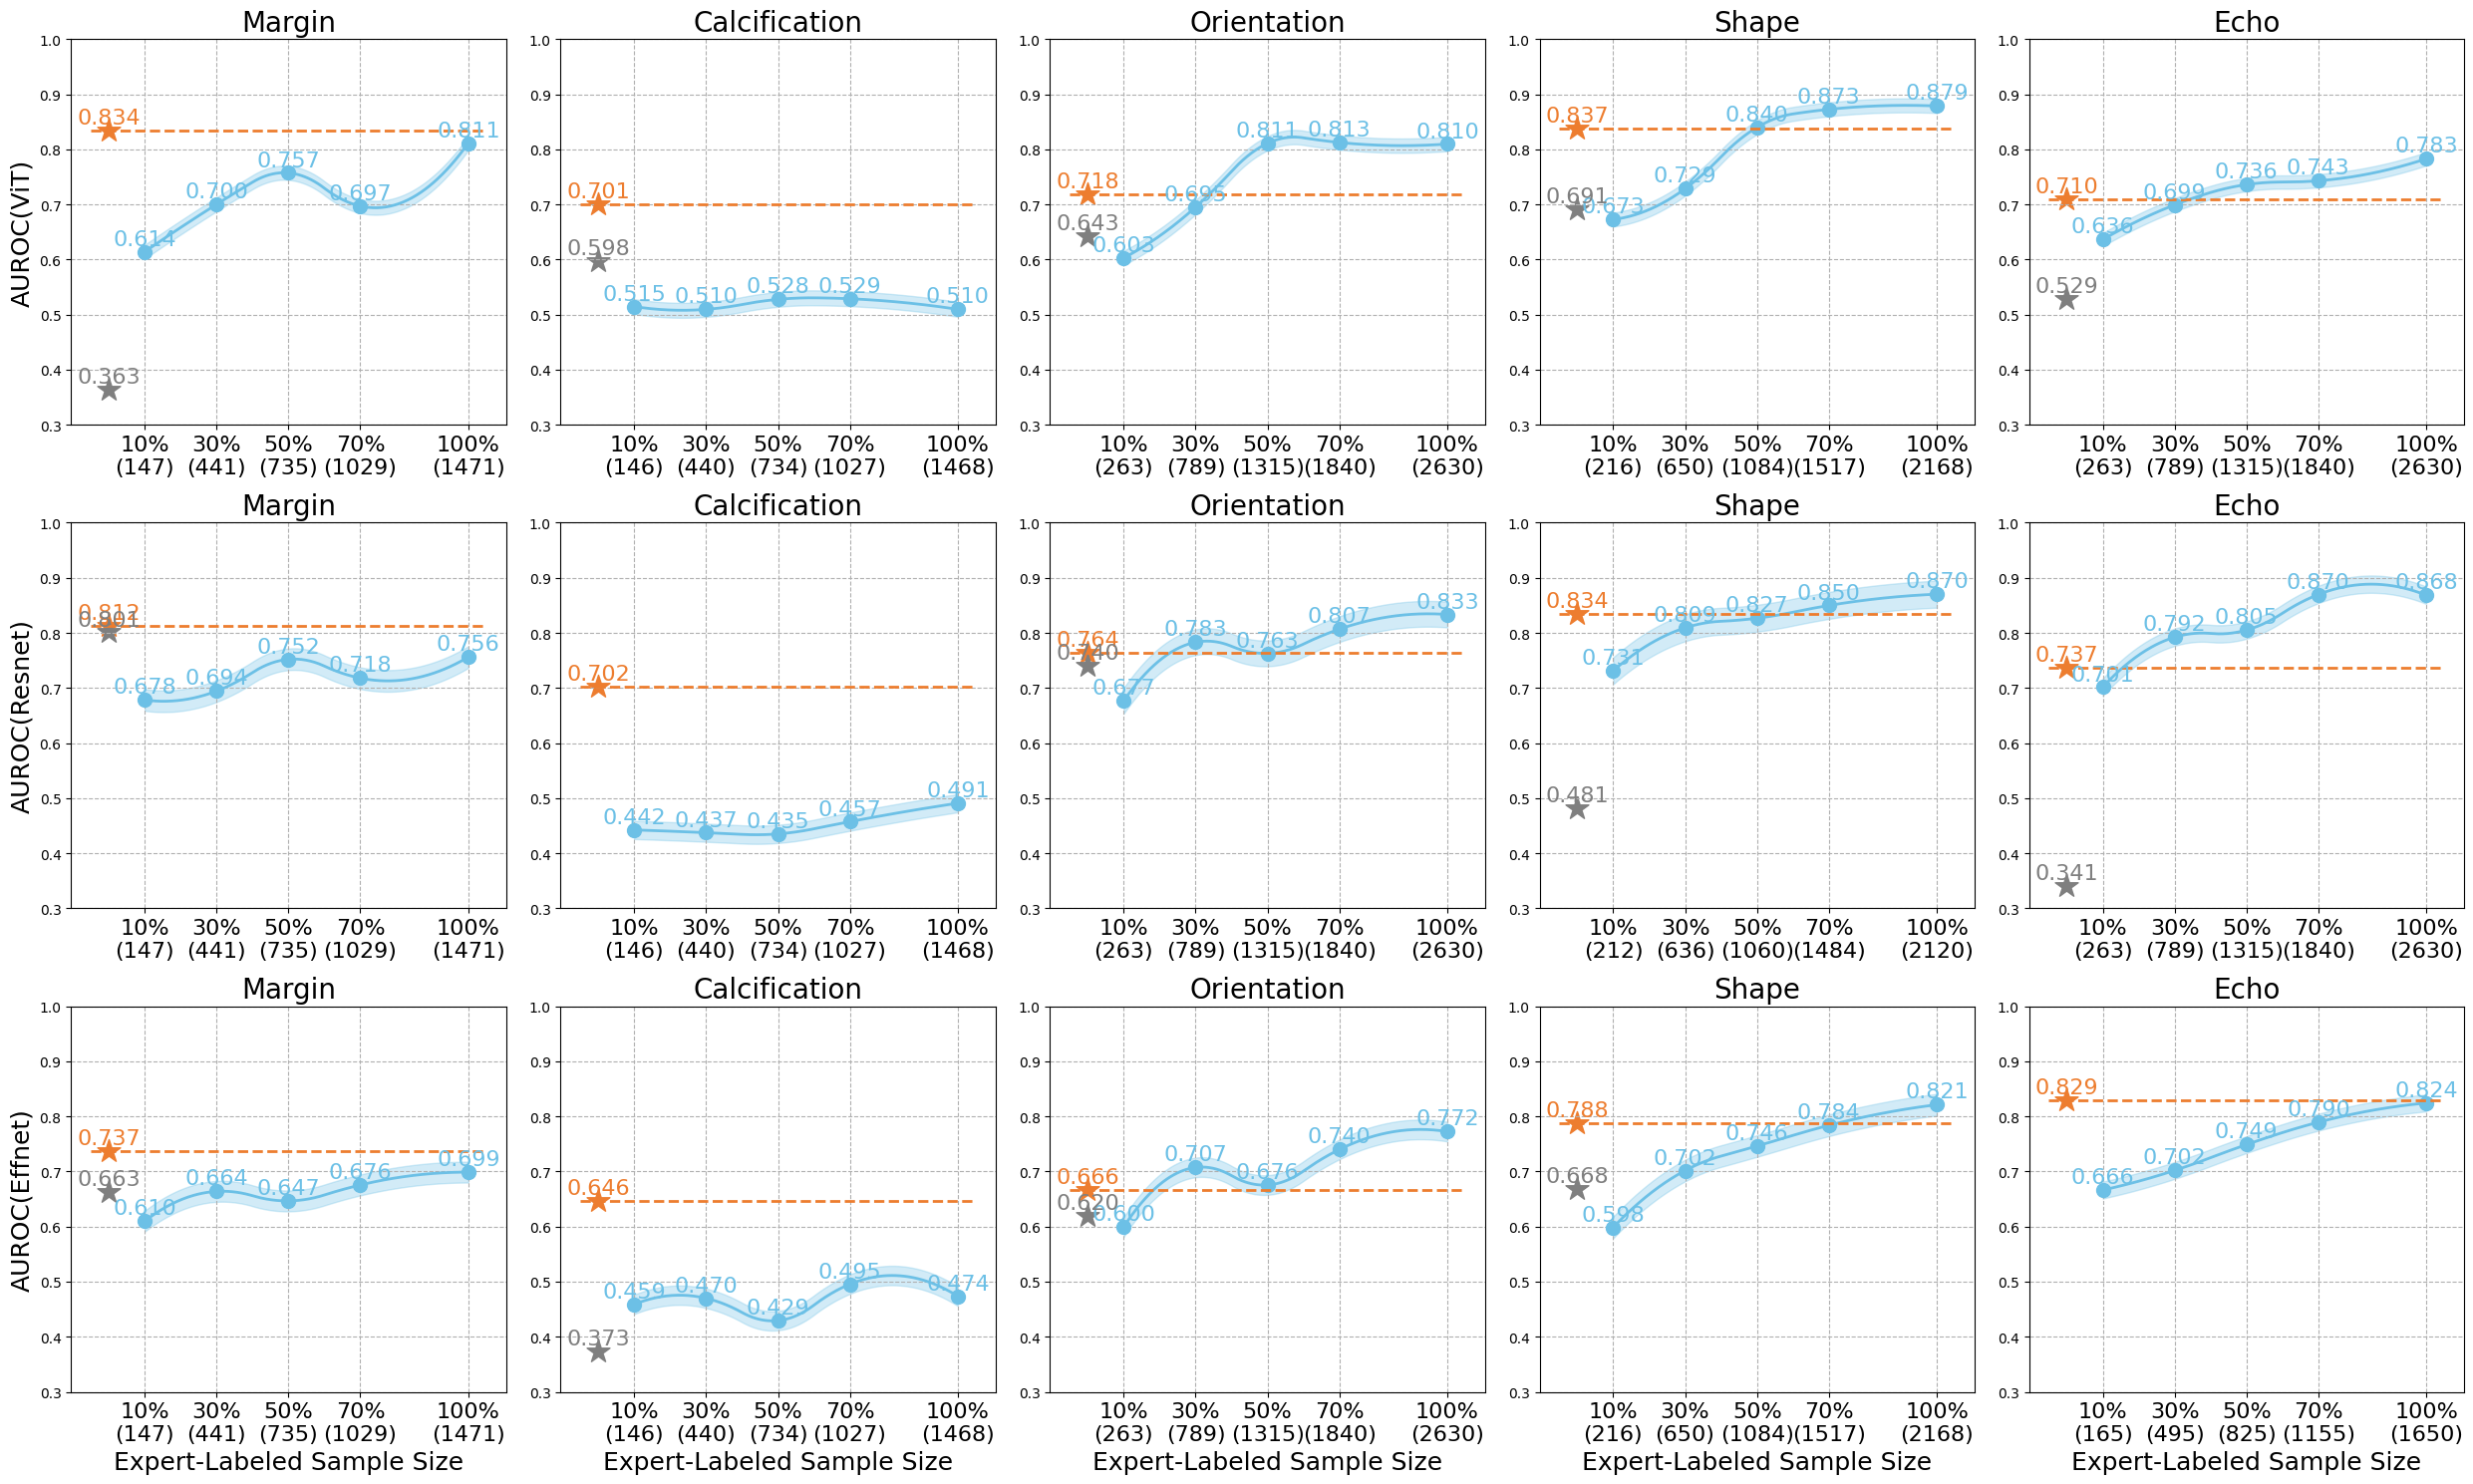

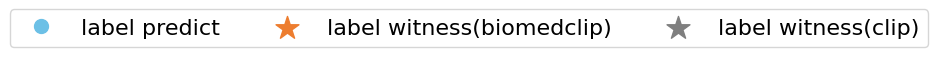

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from matplotlib import gridspec
from scipy.interpolate import make_interp_spline

#Resnet
paths2 = {
    "Margin":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Margin_2024-09-27_20-25-32/result.csv",
    "Calcification":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Calcification_2024-09-27_20-25-32/result.csv",
    "Orientation":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Orientation_2024-09-27_20-25-32/result.csv",
    "Shape":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs/resnet18_breast_Shape_2024-09-27_14-15-25/result.csv",
    "Echo":"/export/home/wuyueting/Classification/Singlelabel/Resnet-case/runs_label_test/resnet18_breast_Echo_2024-09-27_20-25-31/result.csv",
}

#VIT
paths1 = {
    "Margin":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Margin_2024-09-30_10-12-29/result.csv",
    "Calcification":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Calcification_2024-09-30_10-12-29/result.csv",
    "Orientation":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Orientation_2024-09-30_10-12-29/result.csv",
    "Shape":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Shape_2024-09-30_10-12-29/result.csv",
    "Echo":"/export/home/wuyueting/Encoder/mae_like/mae_main_wyt_revised/runs_label_test/vit_base_3_breast_Echo_2024-09-30_10-12-29/result.csv",
}

#Effnet
path3 = {
    "Margin":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Margin_2024-11-01_13-59-47/result.csv",
    "Calcification":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Calcification_2024-11-01_13-59-47/result.csv",
    "Orientation":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Orientation_2024-11-01_12-44-56/result.csv",
    "Shape":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Shape_2024-11-01_12-44-55/result.csv",
    "Echo":"/export/home/wuyueting/Classification/Singlelabel/EfficientNet-case/runs_label_test/effb0_breast_Internal Echo_2024-11-01_12-44-55/result.csv",
}

np.random.seed(0)  # 保持结果一致
confidence_intervals1 = {key: np.random.uniform(0.01, 0.015) for key in paths1.keys()}
confidence_intervals2 = {key: np.random.uniform(0.01, 0.025) for key in paths1.keys()}
confidence_intervals3 = {key: np.random.uniform(0.015, 0.02) for key in paths1.keys()}
confidence_intervals = {
    key: [
        confidence_intervals1[key],
        confidence_intervals2[key],
        confidence_intervals3[key]
    ]
    for key in paths1.keys()
}

print(confidence_intervals)
# print(confidence_intervals1)

witness_auc = [0.834,0.701,0.718,0.837,0.710,
               0.812,0.702,0.764,0.834,0.737,
               0.737,0.646,0.666,0.788,0.829]
clip_auc = [0.363,0.598,0.643,0.691,0.529,
            0.801,0.267,0.740,0.481,0.341,
            0.663,0.373,0.620,0.668,0.209]

# 设置成 3 行 5 列# 将 sample_sizes 设为 5 个点
# 假设 sample_sizes 是从小到大排序的五个点


percent_labels = ['10%', '30%', '50%', '70%', '100%']
fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(3, 5)

lines = []  # 用于保存用于legend的虚拟line对象
lines_clip = []
labels = ['label predict', 'label witness(biomedclip)', 'label witness(clip)']

for i, (name, path) in enumerate(itertools.chain(paths1.items(), paths2.items(), path3.items())):
    csv_data = pd.read_csv(path)
    sample_sizes = csv_data["train_size"]
    auc_values = csv_data['best_auc']
    
    # 插值处理，使得曲线更加平滑
    sample_range = np.linspace(sample_sizes.min(), sample_sizes.max(), 300)
    spline = make_interp_spline(sample_sizes, auc_values, k=2)  # Cubic spline
    auc_smooth = spline(sample_range)
    
    # 置信区间
    ci_lower = auc_smooth - confidence_intervals[name][i//5]
    ci_upper = auc_smooth + confidence_intervals[name][i//5]
    
    custom_labels = [f'{percent}\n({size})' for percent, size in zip(percent_labels, sample_sizes)]
    
    ax = fig.add_subplot(gs[i // 5, i % 5])  # 使用 GridSpec 3 行 5 列
    # line, = ax.plot(sample_sizes, auc_values, label='label predict', color='#6CC0E6', marker='^', linewidth=3, markersize=14)
    smooth_line, = ax.plot(sample_range, auc_smooth, label='label predict', color='#6CC0E6', linewidth=2)
    
    # 置信区间填充
    ax.fill_between(sample_range, ci_lower, ci_upper, color='#6CC0E6', alpha=0.3)
    
    
    smooth_sample_values = spline(sample_sizes)
    scatter_line, = ax.plot(sample_sizes, smooth_sample_values, 'o', label='label predict', color='#6CC0E6', markersize=10)
    
    if i == 0:
        lines.append(smooth_line)
    
    scatter = ax.scatter(0, witness_auc[i], color='#ED7D2F', marker='*', s=300, label='label witness(biomedclip)')
    scatter1 = ax.scatter(0, clip_auc[i], color='#7F7F7F', marker='*', s=300, label='label witness(clip)')
    
    if i == 0:
        lines.append(scatter)
        lines_clip.append(scatter1)

    if i >= 10:
        ax.set_xlabel('Expert-Labeled Sample Size', fontsize=18)
    if i % 5 == 0:
        ax.set_ylabel(f'AUROC({["ViT", "Resnet", "Effnet"][i // 5]})', fontsize=18)
        
    ax.set_title(name, fontsize=20)
    ax.set_ylim(0.3, 1.0)

    # 设置自定义的横坐标标签
    ax.set_xticks(sample_sizes)
    ax.set_xticklabels(custom_labels, fontsize=16)

    x_min, x_max = ax.get_xlim()
    
    ax.hlines(y=witness_auc[i], xmin=x_min, xmax=x_max, linestyles='dashed',linewidth=2, color='#ED7D2F', label='Witness AUC')
    
    for x, y in zip(sample_sizes, auc_values):
        ax.annotate(f'{y:.3f}', xy=(x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=16, color=line.get_color())
    
    ax.annotate(f'{witness_auc[i]:.3f}', xy=(0, witness_auc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=16, color='#ED7D2F')
    ax.annotate(f'{clip_auc[i]:.3f}', xy=(0, clip_auc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=16, color='#7F7F7F')
    
    

    # # 画箭头从 clip_auc 指向 witness_auc
    # ax.annotate(
    #     '',  # 这个参数留空表示画箭头
    #     xy=(0, witness_auc[i]),  # 箭头指向的位置
    #     xytext=(0, clip_auc[i]),  # 箭头起始的位置
    #     arrowprops=dict(arrowstyle='->', color='#7F7F7F', lw=2)  # 箭头样式
    # )


    ax.grid(True, linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 1])
output_path = 'predictvswitness_3rows.png'
plt.savefig(output_path, dpi=330, bbox_inches='tight', transparent=True)
plt.show()


# 创建一个空的figure用于legend
fig, ax = plt.subplots()
legend = ax.legend([scatter_line, lines[1], lines_clip[0]], labels, loc='center', fontsize=16, fancybox=True, ncol=3)

plt.axis('off')
fig.canvas.draw()
bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.set_size_inches(bbox.width, bbox.height)
legend_output_path = 'legend_only_3rows.png'
plt.savefig(legend_output_path, dpi=330, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Define a function to calculate the mean and confidence interval for a list of times
def calculate_stats(times, confidence=0.95):
    mean = np.mean(times)
    n = len(times)
    se = stats.sem(times)
    ci = se * stats.t.ppf((1 + confidence) / 2., n-1)  # 95% confidence interval
    return mean, ci

# Dictionary to store average and CI for each path group
statistics = {'ViT': {}, 'Resnet': {}, 'Effnet': {}}

# Function to load each path's best_time for the highest AUC and compute stats
def load_and_compute(paths, label):
    times_for_max_auc = []
    for name, path in paths.items():
        data = pd.read_csv(path)
        
        # Find the best time corresponding to the maximum AUC
        max_auc_row = data.loc[data['best_auc'].idxmax()]
        times_for_max_auc.append(max_auc_row['best_time'])
    
    # Calculate the mean and confidence interval for the times
    mean, ci = calculate_stats(times_for_max_auc)
    statistics[label] = {'mean_best_time': mean, 'CI': ci}

# Calculate statistics for each group of paths
load_and_compute(paths1, 'ViT')
load_and_compute(paths2, 'Resnet')
load_and_compute(path3, 'Effnet')

# Display results
for model, stats in statistics.items():
    print(f"Model: {model}")
    print(f"Mean Best Time for Maximum AUC = {stats['mean_best_time']:.2f}, CI = ±{stats['CI']:.2f}")



Model: ViT
Mean Best Time for Maximum AUC = 689.50, CI = ±444.80
Model: Resnet
Mean Best Time for Maximum AUC = 246.62, CI = ±161.53
Model: Effnet
Mean Best Time for Maximum AUC = 3096.56, CI = ±982.27


activs_stats/breast_vit_base_3model.blocks[-1].mlp.act/all_train.pkl exist!


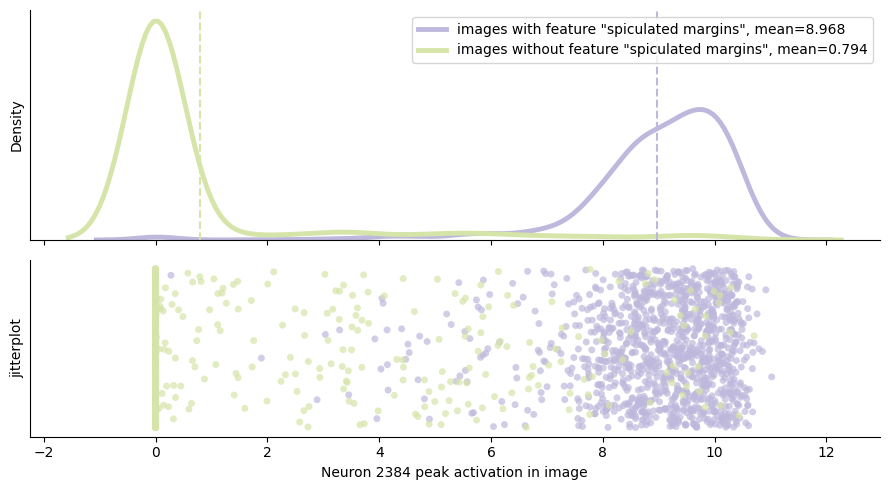

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import os
from utils import models, nethook, activ
import pandas as pd

# 定义生成路径的函数
def reshape_transform(tensor, height=14, width=14):
    # 去掉类别标记
    result = tensor[:, 1:, :].reshape(tensor.size(0),
    height, width, tensor.size(2))

    # 将通道维度放到第一个位置
    result = result.transpose(2, 3).transpose(1, 2)
    return result

def plot_jitter(neuron=2384, feature_name = "BM"):
    label = "all"
    folder_path = f"/export/home/wuyueting/breast_data/BM/3_labelcroped/train/"
    model_name = "breast_vit_base_3"
    target_layer="model.blocks[-1].mlp.act"#"model.resnet.layer4[-1]" #"model.blocks[-1].mlp.act"
    target_save_name = model_name+target_layer
    
    
    if label == "all":
        image_files = sorted([os.path.abspath(os.path.join(folder_path+"0", file)) for file in os.listdir(folder_path+"0")] +[os.path.abspath(os.path.join(folder_path+"1", file)) for file in os.listdir(folder_path+"1")])
    else:
        image_files = sorted([os.path.abspath(os.path.join(folder_path+label, file)) for file in os.listdir(folder_path+label)])
    activ.get_same_class_stats(model_name,image_files, reshape_transform, target_layer=target_layer,save=f"activs_stats/{target_save_name}/{label}_train.pkl")
    
    f = open(f"activs_stats/{target_save_name}/{label}_train.pkl","rb")
    data = pickle.load(f) #[weights, max_activations, mean_activations]
    f.close()
    
    # ori_gradients = data[:, neuron, 0]
    ori_activations = data[:, neuron, 1]
    
    
    label_data = pd.read_csv("/export/home/wuyueting/breast_data/all_label_train.csv")
    
    def get_image_file_path(row):
        if "FB" in row["Image Name"]:
            return os.path.join(folder_path, "0", row["Image Name"])
        else:
            return os.path.join(folder_path, "1", row["Image Name"])
    if feature_name != "BM":       
        filtered_data = label_data.dropna(subset=[feature_name]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        class_0_images= filtered_data[filtered_data[feature_name]==0]['image_file'].tolist()
        class_1_images= filtered_data[filtered_data[feature_name]==1]['image_file'].tolist()
    else:
        filtered_data = label_data.dropna(subset=["Image Name"]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        class_0_images = filtered_data[filtered_data['Image Name'].str.contains("FB")]['image_file'].tolist()
        class_1_images = filtered_data[~filtered_data['Image Name'].str.contains("FB")]['image_file'].tolist()
        
    
    class_0_indices = [idx for idx, img in enumerate(image_files) if img in class_0_images]
    class_1_indices = [idx for idx, img in enumerate(image_files) if img in class_1_images]



    activation_0 = ori_activations[class_0_indices].tolist()  
    activation_1 = ori_activations[class_1_indices].tolist()

    mean_activation_0 = np.mean(activation_0)
    mean_activation_1 = np.mean(activation_1)

    # # 显示图像
    # plt.show()
    # 创建一个DataFrame来组织数据
    data = pd.DataFrame({
        "Activation": activation_0 + activation_1,  # 将两个列表连接在一起
        "Margin": ['0'] * len(activation_0) + ['1'] * len(activation_1),  # 对应的分类标签
        "y": ['0'] * (len(activation_0) + len(activation_1))  # 用于抖动图的y轴
    })
      
    # 创建两个子图，使用共享的x轴
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,5), sharex=True, gridspec_kw={'height_ratios': [1.3, 1]})
    # plt.figure(figsize=(10, 4))  # 调整高度为4，使图更矮
    # 上面的KDE密度估计曲线
    
    feature_description = "spiculated margins"
    sns.kdeplot(activation_0, color='#BEB8DC', label=f"images with feature \"{feature_description}\", mean={mean_activation_0:.3f}", ax=ax1,linewidth=3.5)
    sns.kdeplot(activation_1, color='#D5E4A8', label=f"images without feature \"{feature_description}\", mean={mean_activation_1:.3f}", ax=ax1,linewidth=3.5)

    # 显示密度曲线的均值
    ax1.axvline(mean_activation_0, color='#BEB8DC', linestyle='--')
    ax1.axvline(mean_activation_1, color='#D5E4A8', linestyle='--')

    # 添加密度图的标签和标题
    ax1.legend()
    ax1.set_ylabel("Density")
    ax1.set_yticks([])  # 去掉y轴刻度
    # ax1.set_title(f"Neuron {neuron} Peak Activation Density with Feature {feature_name}")
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # 下面的抖动图
    sns.stripplot(x="Activation", y="y", data=data, jitter=0.45, hue="Margin", palette=['#BEB8DC','#D5E4A8'], dodge=False, size=5, edgecolor='black',alpha=0.7, ax=ax2)

    ax2.legend().remove()
    # 添加抖动图的标签
    ax2.set_xlabel(f"Neuron {neuron} peak activation in image")
    ax2.set_ylabel("jitterplot")
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 去掉y轴的标签和刻度线
    ax2.set_yticks([])  # 去掉y轴刻度

    # 调整布局和显示图像
    plt.tight_layout()
    plt.show()
    fig.savefig("output_image_breast.png", dpi=330, transparent=True)

plot_jitter()

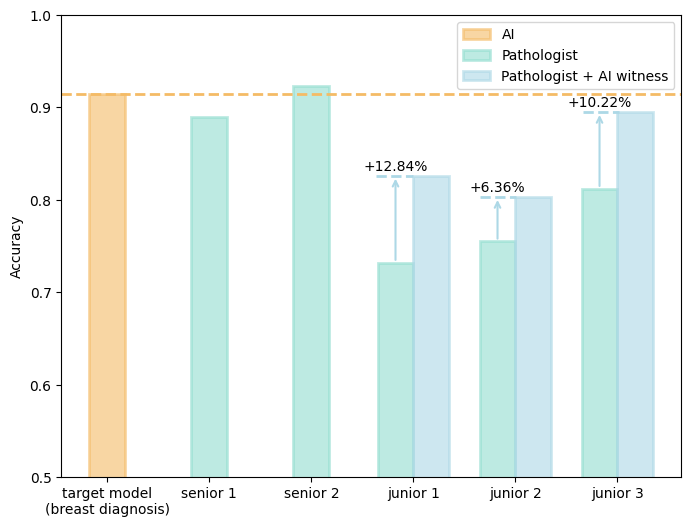

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
labels = ['target model\n(breast diagnosis)', 'senior 1', 'senior 2', 'junior 1', 'junior 2', 'junior 3']
values = [0.915, 0.890, 0.923, 0.732, 0.755, 0.812]  # Pathologist 的值
values_with_ai = [None, None, None, 0.826, 0.803, 0.895]  # 带有 AI 辅助的值
target_value = values[0]
x = np.arange(len(labels))  # X 轴位置
width = 0.35  # 每组柱子的宽度

fig, ax = plt.subplots(figsize=(8, 6))  # 将图像宽度加大

# 设置不同的颜色
color_ai = '#F4BB66'
color_pathologist = '#91DDCF'
color_pathologist_ai = '#ADD8E6'

# 设置透明度
alpha = 0.6

ax.set_ylim(0.5,1)

# 在 target model 的值位置添加一条水平线
ax.axhline(y=target_value, color=color_ai, linestyle='--', linewidth=2)

# 绘制 AI, Pathologist 和 Pathologist + AI witness 的柱子（使用描边和透明填充）
ax.bar(x[0], values[0], width, edgecolor=color_ai, facecolor=color_ai, alpha=alpha,linewidth=2, label='AI')
ax.bar(x[1], values[1], width, edgecolor=color_pathologist, facecolor=color_pathologist,linewidth=2, alpha=alpha)
ax.bar(x[2], values[2], width, edgecolor=color_pathologist, facecolor=color_pathologist,linewidth=2, alpha=alpha)

# 第四到第六列，分别绘制 pathologist 和 pathologist + AI witness
for i in range(3, 6):
    
    ax.bar(x[i] - width/2, values[i], width, edgecolor=color_pathologist,linewidth=2, facecolor=color_pathologist, alpha=alpha, label='Pathologist' if i == 3 else "")
    ax.bar(x[i] + width/2, values_with_ai[i], width, edgecolor=color_pathologist_ai,linewidth=2, facecolor=color_pathologist_ai, alpha=alpha, label='Pathologist + AI witness' if i == 3 else "")

    
    # Calculate the improvement
    if values_with_ai[i] is not None:
        improvement = values_with_ai[i] - values[i]
        improvement_ratio =improvement/values[i]
        # Add an arrow
        ax.annotate('', 
                    xy=(x[i] - width/2,values_with_ai[i]), 
                    xytext=(x[i] - width/2,  values[i]),
                    arrowprops=dict(edgecolor=color_pathologist_ai, arrowstyle="->", lw=1.5),
                    ha='center', color=color_pathologist_ai)
        ax.text(
        x[i] - width/2, values_with_ai[i]+0.003,  # 文字位置在箭头中间
        f'+{improvement_ratio*100:.2f}%',  # 显示增量值
        ha='center', va='bottom', color='black'
    )
    xmin_normalized = (x[i]+0.05) / len(labels)
    xmax_normalized = (x[i]+ width+0.05)  / len(labels)
    ax.axhline(
        y=values_with_ai[i], color=color_pathologist_ai, linestyle='--', linewidth=2, 
        xmin=xmin_normalized, xmax=xmax_normalized
    )
# 设定标签和标题
# ax.set_xlabel('Categories')
ax.set_ylabel('Accuracy')
# ax.set_title('Comparison between AI, Pathologist, and Pathologist + AI Witness')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
fig.savefig("breast_imporvement.png", dpi=330, transparent=True)
    
